In [9]:
import csv
from statistics import mean, stdev
import os

cwd = os.getcwd ()

def average(filen = "data/max_avg_spread_example_1000_ER.csv"):

    os.chdir('data')

    N = int(filen.split('_')[-2])

    with open(filen, mode ='r')as file:
   
        # reading the CSV file
        avg = []
        csvFile = csv.reader(file)
        
        # displaying the contents of the CSV file
        for lines in csvFile:
                avg.append(float(lines[0]))

    os.chdir(cwd)

    return N, mean(avg), stdev(avg)




def calculate_avg(file_list):

    results = []

    for f in file_list:
        results.append(average(f))

    return results



result = calculate_avg(os.listdir('data'))


In [13]:
nodes = []
avg = []
std = []

for i, j, k in result:
    nodes.append(i)
    avg.append(j)
    std.append(k)

In [24]:
nodes

[1000, 1500, 10, 50, 100, 500]

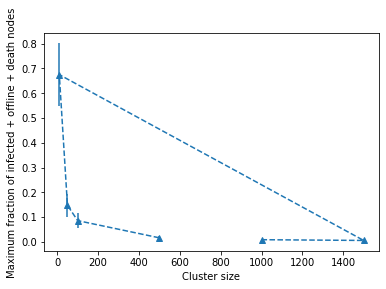

In [23]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(nodes)
y = np.array(avg) # Effectively y = x**2
e = np.array(std)

plt.errorbar(x, y, e, linestyle='dashed', marker='^')
plt.ylabel("Maximum fraction of infected + offline + death nodes")
plt.xlabel("Cluster size")
plt.loglog

plt.show()

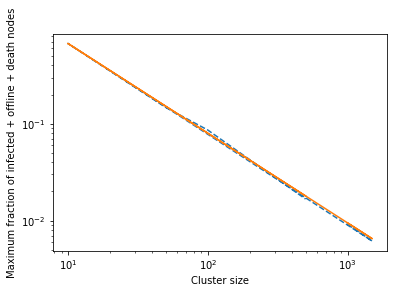

In [21]:
from scipy.optimize import curve_fit

x = np.array(nodes)
y = np.array(avg) # Effectively y = x**2
plt.loglog(x, y, linestyle='dashed')

def power_law(x, a, b):
    return a * np.power(x, -b)

popt, pcov = curve_fit(power_law, x, y)

plt.ylabel("Maximum fraction of infected + offline + death nodes")
plt.xlabel("Cluster size")
plt.plot(x, power_law(x, *popt), label='power law')

plt.show()

In [22]:
popt

array([5.70086694, 0.92680038])